In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [37]:
mydata = pd.read_csv('lenses.txt', sep = '\t')
label = mydata.columns[-1] #refer to the name of label, generally the last columns
mydata

,young,myope,no,reduced,no lenses
0,young,myope,no,normal,soft
1,young,myope,yes,reduced,no lenses
2,young,myope,yes,normal,hard
3,young,hyper,no,reduced,no lenses
4,young,hyper,no,normal,soft
5,young,hyper,yes,reduced,no lenses
6,young,hyper,yes,normal,hard
7,pre,myope,no,reduced,no lenses
8,pre,myope,no,normal,soft
9,pre,myope,yes,reduced,no lenses


In [30]:
def BestFeature(data):
    featureName = data.columns[:-1]
    labelName = data.columns[-1]
    labelValue = data[labelName].drop_duplicates().values
    if data[labelName].drop_duplicates().shape[0] == 1:
        return mydata[label].drop_duplicates().values[0]
    H = 0
    for lv in labelValue:
        H += -(data[data[label] == lv].shape[0]/data.shape[0])*\
        math.log2((data[data[label] == lv].shape[0]/data.shape[0]))
    list_H_C = []
    for fn in featureName:
        H_C = H
        featureValue = data[fn].drop_duplicates().values
        for fv in featureValue:
            d = data[data[fn] == fv]
            h = 0
            for lv in labelValue:
                try:
                    h += -(d[d[label] == lv].shape[0]/d.shape[0])*\
                        math.log2((d[d[label] == lv].shape[0]/d.shape[0]))
                except:
                    h += -(d[d[label] == lv].shape[0]/d.shape[0])*0
            H_C -= (d.shape[0]/data.shape[0])*h
        list_H_C.append(H_C/H)
    return featureName[list_H_C.index(max(list_H_C))]

In [31]:
def SplitData(data, bestFeature, bestFeatureValue):
    return data[data[bestFeature] == bestFeatureValue].drop([bestFeature], axis = 1)

In [32]:
def DecisionTree(data):
    if data[label].drop_duplicates().shape[0] == 1:
        return data[label].drop_duplicates().values[0]
    tree = {}
    tree_feature = {}
    bf = BestFeature(data)
    for bfv in data[bf].drop_duplicates().values:
        splitData = SplitData(data, bf, bfv)
        tree_feature[bfv] = DecisionTree(splitData)
    tree[bf] = tree_feature
    return tree

In [33]:
tree = DecisionTree(mydata)
tree

{'reduced': {'normal': {'no': {'no': {'young': {'pre': 'soft',
      'presbyopic': {'myope': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'myope': {'hyper': {'young': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

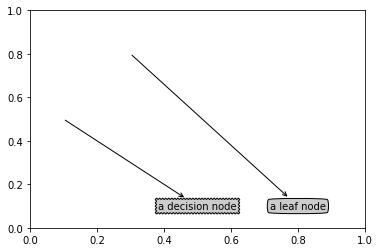

In [14]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = True) #ticks for demo puropses 
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()
createPlot()

In [35]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0] 
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=True, **axprops)    #no ticks
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()  

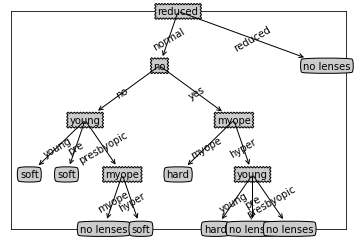

In [36]:
createPlot(tree)